Dostępne dane na temat produktów o ID:
13029872
22496575
44265107
Podaj kod produktu: 
44265107

O produkcie dostępnych jest 41 opinii.
W 22 opiniach podana została lista zalet produkty, a w 0 lista wad. 
Średnia ocena produktu wyznaczona na podstawie liczby gwiazdek w opiniach wynosi 4.6.
Produkt zakupiony pierwszy raz 2017-11-02. Ostatni dokonany zakup miał miejsce 2021-04-13.
Procent opinii potwierdzonych zakupem wynosi 97.56%.
Liczba wymienionych zalet przez wszystkich użytkowników to 60, natomiast wad 0.

Treść najprzydatniejszej opinii:
 'Z produktem wszystko OK, szybka realizacja. 
Jedna rzecz na minus, firma nie wystawia polskiej karty gwarancyjne, co uniemożliwia skorzystanie z przedłużonej gwarancji producenta do 3 lat.'


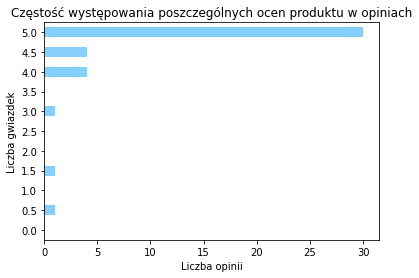

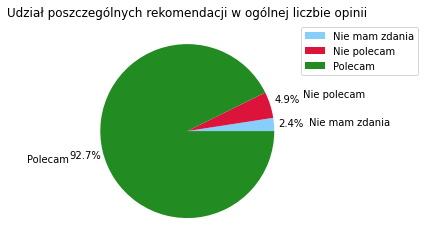

rcmd   Nie mam zdania  Nie polecam  Polecam
stars                                      
0.5                 0            1        0
1.5                 0            1        0
3.0                 1            0        0
4.0                 0            0        4
4.5                 0            0        4
5.0                 0            0       30



purchased  False  True 
stars                  
0.5            0      1
1.5            1      0
3.0            0      1
4.0            0      4
4.5            0      4
5.0            0     30


In [33]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from dateutil import parser

pd.set_option('display.max_columns', None)

print("Dostępne dane na temat produktów o ID:")
print(*[str(x).split('.')[0] for x in os.listdir("opinions") if x[0] != '.'], sep='\n')

productId = input("Podaj kod produktu: \n")
opinions = pd.read_json(f"./opinions/{productId}.json")

opinions.stars = opinions.stars.apply(lambda x: float(x.split("/")[0].replace(",", ".")))
opinions.rcmd = opinions.rcmd.apply(lambda x: "Nie mam zdania" if x is None else x)

purchase = opinions.purchaseDate.values.tolist()
parsedPurchaseDates = [parser.parse(p) for p in purchase if p]

opinionsCount = len(opinions)
prosCount = opinions.pros.astype(bool).sum()
consCount = opinions.cons.astype(bool).sum()
averageScore = opinions.stars.mean()
firstBought = min(parsedPurchaseDates).date()
lastBought = max(parsedPurchaseDates).date()
confirmedByPurchase = round(100 * opinions.purchased.count() / opinionsCount, 2)
sumOfPros = sum(map(lambda x: len(x), opinions.pros.values))
sumOfCons = sum(map(lambda x: len(x), opinions.cons.values))

print(f'''\nO produkcie dostępnych jest {opinionsCount} opinii.
W {prosCount} opiniach podana została lista zalet produkty, a w {consCount} lista wad. 
Średnia ocena produktu wyznaczona na podstawie liczby gwiazdek w opiniach wynosi {averageScore:.1f}.
Produkt zakupiony pierwszy raz {firstBought}. Ostatni dokonany zakup miał miejsce {lastBought}.
Procent opinii potwierdzonych zakupem wynosi {confirmedByPurchase}%.
Liczba wymienionych zalet przez wszystkich użytkowników to {sumOfPros}, natomiast wad {sumOfCons}.\n''')

print(f"Treść najprzydatniejszej opinii:\n '{opinions.iat[opinions.useful.idxmax(), 3]}'")

stars = opinions.stars.value_counts().reindex(np.arange(0,5.5,0.5), fill_value=0)
stars.plot.barh(color = 'lightskyblue')
plt.title("Częstość występowania poszczególnych ocen produktu w opiniach")
plt.xlabel("Liczba opinii")
plt.ylabel("Liczba gwiazdek")
plt.savefig(f"./figures/{productId}_stars.png", bbox_inches="tight")
plt.show()
plt.close()

recommendations = opinions.rcmd.value_counts(dropna = False).sort_index()
recommendations.plot.pie(
    label="",
    colors = ['lightskyblue', 'crimson', 'forestgreen'],
    autopct = "%1.1f%%",
    pctdistance = 1.2,
    labeldistance = 1.4
)
plt.title('Udział poszczególnych rekomendacji w ogólnej liczbie opinii')
plt.legend(bbox_to_anchor = (1.0,1.0))
plt.savefig(f"./figures/{productId}_rcmd.png", bbox_inches="tight")
plt.show()
plt.close()

stars_rcmd = pd.crosstab(opinions.stars, opinions.rcmd.fillna('None'))
print(stars_rcmd)

print('\n\n')

d = {'Opinia potwierdzona zakupem': True, None: False}
stars_cons = pd.crosstab(opinions.stars, opinions.purchased.replace(d))
print(stars_cons)